### Exercise: Simple kNN Regression

The goal of the exercise is to recreate and add details about the subjects learned in class.

Instructions:
Part 1: KNN by hand for k=1
* Read the Advertisement data.
* Apply the kNN algorithm by hand and plot the first graph comparing predicted values ​​with actual values

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading data and analyzing the quantity of data available:

In [362]:
dados = pd.read_csv('Advertising.csv')
X = dados.drop(columns=["Sales"])[["TV"]]
y = dados[["Sales"]]

print(f'Quantity of data available for this activity: {len(X)}')

Quantity of data available for this activity: 200


In [407]:
dados.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Splitting data into training data and test data:

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Below is defined the function that calculates the nearest neighbor from an array of numbers and a value:

In [364]:
def neighboor(array, value):
    distances = []
    for i in array:
        distances.append(float(np.abs(i-value.iloc[0])))
    min_idx = np.argmin(distances)

    return array[min_idx]

Performing tests with the nearest neighbors function:

In [366]:
y_predict = {}

for idx, value in X_test.iterrows():
    neighboor_distance = neighboor(X_train["TV"].to_list(), value)
    idx_number = X_train.index[X_train["TV"] == neighboor_distance].tolist()
    y_predict[idx] = y_train.loc[y_train.index == idx_number[0]]["Sales"].values.item()


Calculating the error to analyze the quality of the model:

In [388]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, list(y_predict.values()))

print(f"The MSE value for knn with k = 1 was: {mse}")


The MSE value for knn with k = 1 was: 14.226


What does MSE = 14 mean? It's important to note that the "Sales" and "TV" scales are the same; both work with a value of $1,000. Furthermore, the values ​​of "Sales," the predictor variable, range from $3,200 to $25,400. Therefore, an MSE of 14.23 results in an RMSE of approximately 3.78, or a mean error of $3,780.

The range for "Sales" is $22,200, and the error is equivalent to 17.02% of the range. Considering these values, it's possible to judge the MSE result as reasonable or good, since although $3,780 is a considerable difference, it's not considered a terrible value on a general scale.

In short, considering that I am using only k=1, the result of MSE = 14.23 allows the model to be read as reasonable or good.

Drawing the graph to visualize how the predictions performed:

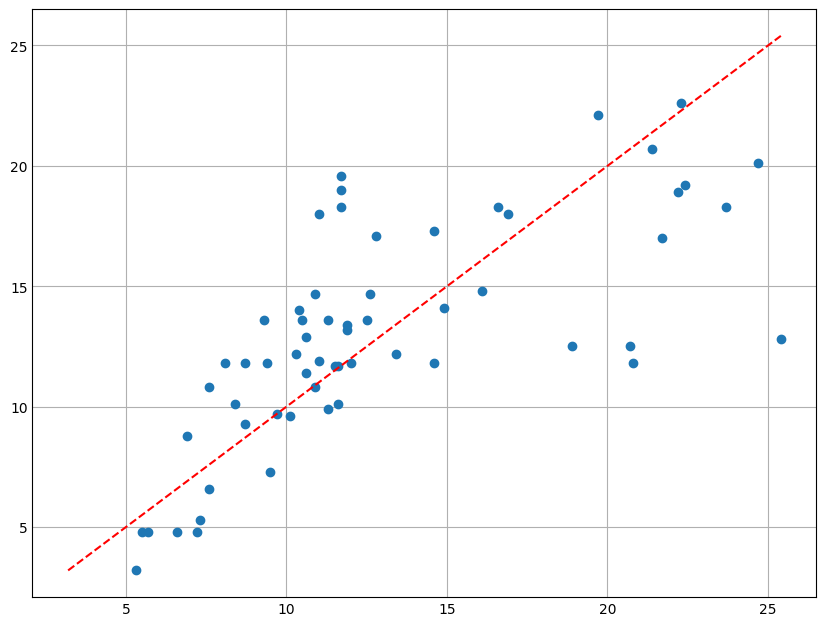

In [411]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use("_mpl-gallery")
graph1 = ax.scatter(y_test, list(y_predict.values()))

min_val = min(min(y_test["Sales"]), min(list(y_predict.values())))
max_val = max(max(y_test["Sales"]), max(list(y_predict.values())))
ax.plot([min_val, max_val], [min_val, max_val], 'r--');

The graph above shows the comparison between the predicted results and the actual values. It can be seen that some values ​​were predicted correctly, while others were either underestimated (predicting lower values ​​than the true ones) or overestimated (predicting higher values ​​than the true ones).

Overall, considering the model used, the predictions are acceptable, as most points are close to the line, with few outliers.

Part 2: Generalizing KNN
* Read the Advertisement dataset.
* Split the data into train and test sets using the train_test_split() function.
* Write the function for nearest neighbors with k > 1.
* Set k_list  as the possible k values ranging from 1 to 70.
* For each value of k in k_list:
    * Also use sklearn KNearestNeighbors() to fit train data and then compare with the results found by your function.
    * Predict on the test data.